### 实验得到的checkpoint未保存，每次训练过程都会自动保存更优预测结果，大致的修改操作为：
### 1.对网络结构的修改主要包括：增加残差块以及bn操作，减小了下采样的尺寸并采用平均池化，增加了网络层数，使用用大小为3的一维卷积，激活函数替换为LeakyReLU。
### 2.取消了数据标准化的操作，取得部分数据进行数据增强，主要是添加高斯噪声，提升比较有限。
### 3.目前测试的最有学习率在0.002附近，batch_size为32
### 4.具体对baseline的修改已在代码注释中给出

## 赛事介绍
如今的智能机已经很智能了，如果手机可以觉察到我们在生活中的一举一动，知道我们行动的意图，你觉得会如何？智能手机不仅搭载了多种惯性传感器，这使得基于智能手机的人体行为识别研究越来越受关注。

![](https://ai-studio-static-online.cdn.bcebos.com/849f5b245156468c850ad6adad6f5ba649184a062cb44d128ba504c61652ae8a)

在本次赛题由志愿者使用智能手机时，通过基本活动的行为构建而成。希望选手能够构建模型对活动行为进行预测。

## 赛事任务
实验是在 19-48 岁年龄段的 30 名志愿者中进行的。每个人在腰部佩戴智能手机（三星 Galaxy S II）进行六项活动（步行、楼上步行、楼下步行、坐、站、躺）。实验以 50Hz 的恒定速率捕获 3 轴线性加速度和 3 轴角速度。

赛题训练集案例如下：
- 训练集8千条数据；
- 测试集共2000条数据；

数据总共100MB，赛题数据均为csv格式，列使用逗号分割。若使用Pandas读取数据，可参考如下代码：

```
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv.zip')
```

对于数据集中的每一条记录，都提供了以下内容，来自加速度计的三轴加速度（总加速度）和估计的身体加速度、和来自陀螺仪的三轴角速度。总共是具有时域和频域变量的561个特征向量。

测试集中label字段Activity为空，需要选手预测。

## 评审规则

1. 数据说明：选手需要提交测试集队伍排名预测，具体的提交格式如下：
```
Activity
STANDING
LAYING
WALKING
SITTING
WALKING
WALKING_DOWNSTAIRS
STANDING
```

2. 评估指标：本次竞赛的使用准确率进行评分，数值越高精度越高，评估代码参考：
```
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
accuracy_score(y_true, y_pred)
```

## Baseline使用指导
1、点击‘fork按钮’，出现‘fork项目’弹窗         
2、点击‘创建按钮’ ，出现‘运行项目’弹窗    
3、点击‘运行项目’，自动跳转至新页面      
4、点击‘启动环境’ ，出现‘选择运行环境’弹窗     
5、选择运行环境（启动项目需要时间，请耐心等待），出现‘环境启动成功’弹窗，点击确定        
6、点击进入环境，即可进入notebook环境      
7、鼠标移至下方每个代码块内（代码块左侧边框会变成浅蓝色），再依次点击每个代码块左上角的‘三角形运行按钮’，待一个模块运行完以后再运行下一个模块，直至全部运行完成  
![](https://ai-studio-static-online.cdn.bcebos.com/226c72f88f5b4e9d8a55e59129e4c79770aa200f10ef413ca1420ae7d273bc88)  
![](https://ai-studio-static-online.cdn.bcebos.com/866a22a341d64166aaf9a8a3abee09b5a6e2d0cba1c649bb8bdef6b2ad7955f1)  
    
8、下载页面左侧submission.zip压缩包  
![](https://ai-studio-static-online.cdn.bcebos.com/b7f3076301e34462abaf2013dcdbf10a5dcbfe287d5845f1869493e578391f7a)  
     
9、在比赛页提交submission.zip压缩包，等待系统评测结束后，即可登榜！    
![](https://ai-studio-static-online.cdn.bcebos.com/95a9fc4140144a2d8a76258f7a536751c5c6969994154d3da71c80e23757c6c8)  
       
10、点击页面左侧‘版本-生成新版本’  
![](https://ai-studio-static-online.cdn.bcebos.com/e62d0f5ca1454f7485c3eb1351823315480356cafad143c2ab2ff065f95104fe)  
        
11、填写‘版本名称’，点击‘生成版本按钮’，即可在个人主页查看到该项目（可选择公开此项目哦）  

## 数据分析

In [25]:
import pandas as pd
import paddle
import numpy as np

%pylab inline
import seaborn as sns

train_df = pd.read_csv('data/data137267/train.csv.zip')
test_df = pd.read_csv('data/data137267/test.csv.zip')
part1 = pd.read_csv('data/data137267/98.csv')
part2 = pd.read_csv('data/data137267/97.95.csv')
part3 = pd.read_csv('data/data137267/97.85.csv')
part4 = pd.read_csv('data/data137267/97.81.csv')
part5 = pd.read_csv('data/data137267/97.80.csv')


Populating the interactive namespace from numpy and matplotlib


In [26]:
#提升数据上限，将多次预测测试集合中预测相同的结果认为是正确的分类结果，将该部分数据作为训练数据
temp = [] 
for i in range(part1.shape[0]):
    if part1.iloc[[i],[-1]].values[0][0] == part2.iloc[[i],[-1]].values[0][0]==part3.iloc[[i],[-1]].values[0][0]==part4.iloc[[i],[-1]].values[0][0]==part5.iloc[[i],[-1]]\
    .values[0][0]:
        temp.append(i)

In [27]:
new_data = test_df.iloc[[0],:]
for i in temp[1:]:
    new_data = pd.concat([new_data, test_df.iloc[[i],:]], ignore_index=True)

In [28]:
new_lable = part1.iloc[[0],:]
for i in temp[1:]:
    new_lable = pd.concat([new_lable, part1.iloc[[i],:]], ignore_index=True)

In [29]:
new_data = pd.concat([new_data, new_lable], ignore_index=False,axis=1)

In [30]:
train_df.shape

(8000, 562)

In [31]:
train_df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'Activity'],
      dtype='object', length=562)

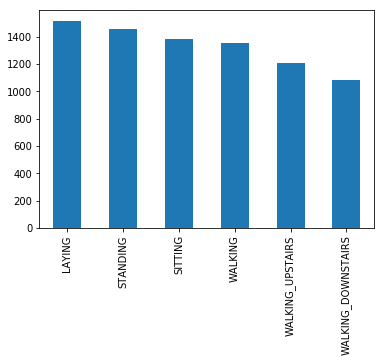

In [32]:
train_df['Activity'].value_counts().plot(kind='bar')

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/seaborn/categorical.py:340: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(s, dtype=np.float)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/seaborn/utils.py:538: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float

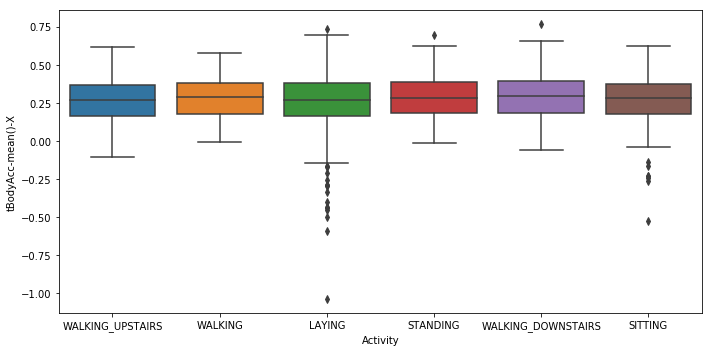

In [33]:
plt.figure(figsize=(10, 5))
sns.boxplot(y='tBodyAcc-mean()-X', x='Activity', data=train_df)
plt.tight_layout()

In [34]:
from paddle.io import Dataset

In [35]:
train_df['Activity'] = train_df['Activity'].map({
    'LAYING': 0,
    'STANDING': 1,
    'SITTING': 2,
    'WALKING': 3,
    'WALKING_UPSTAIRS': 4,
    'WALKING_DOWNSTAIRS': 5
})
new_data['Activity'] = new_data['Activity'].map({
    'LAYING': 0,
    'STANDING': 1,
    'SITTING': 2,
    'WALKING': 3,
    'WALKING_UPSTAIRS': 4,
    'WALKING_DOWNSTAIRS': 5
})

In [36]:
from paddle.io import Dataset

In [37]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(train_df.values[:, :-1])
# train_df.iloc[:, :-1] = scaler.transform(train_df.values[:, :-1])
# test_df.iloc[:, :] = scaler.transform(test_df.values)

In [38]:
# import random

# train_df4 = train_df[:-500].sample(n=None, frac=0.6, replace=False, weights=None, random_state=0, axis=None)

# for i in range(0,train_df3.shape[0]):
#     for j in range(0,train_df4.shape[1]-1):
#         train_df.iloc[[i], [j]] += random.gauss(0, 0.05)
# train_df = pd.concat([train_df, train_df4], ignore_index=True)

## 为数据添加高斯噪声

In [ ]:
#视具体情况添加高斯噪声，并不是所有情况下都有较好的效果
import random

train_df5 = train_df[:-1000].sample(n=None, frac=0.5, replace=False, weights=None, random_state=None, axis=None)

for i in range(0,train_df5.shape[0]):
    for j in range(0,train_df5.shape[1]-1):
        train_df5.iloc[[i], [j]] += random.gauss(0, 0.03)
train_df = pd.concat([train_df, train_df5], ignore_index=True)

## 搭建模型

In [39]:
class Classifier(paddle.nn.Layer):
    # self代表类的实例自身
    def __init__(self):
        # 初始化父类中的一些参数
        super(Classifier, self).__init__()
        
        self.conv1_1 = paddle.nn.Conv1D(in_channels=1, out_channels=1, kernel_size=1)
        self.conv1_2 = paddle.nn.Conv1D(in_channels=16, out_channels=16, kernel_size=3)
        self.conv1_3 = paddle.nn.Conv1D(in_channels=1, out_channels=16, kernel_size=3)


        self.conv2_1 = paddle.nn.Conv1D(in_channels=32, out_channels=32, kernel_size=1)
        self.conv2_2 = paddle.nn.Conv1D(in_channels=32, out_channels=32, kernel_size=3)
        self.conv2_3 = paddle.nn.Conv1D(in_channels=16, out_channels=32, kernel_size=3)


    
        self.conv3_1 = paddle.nn.Conv1D(in_channels=32, out_channels=32, kernel_size=1)
        self.conv3_2 = paddle.nn.Conv1D(in_channels=64, out_channels=64, kernel_size=3)
        self.conv3_3 = paddle.nn.Conv1D(in_channels=32, out_channels=64, kernel_size=3)

       
        self.conv4_3 = paddle.nn.Conv1D(in_channels=64, out_channels=128, kernel_size=3)


        self.conv5_3 = paddle.nn.Conv1D(in_channels=128, out_channels=256, kernel_size=3)


        self.flatten = paddle.nn.Flatten()
        self.dropout = paddle.nn.Dropout()
        self.fc = paddle.nn.Linear(in_features=256, out_features=6)
        #使用LeakyReLU效果更优
        self.relu = paddle.nn.LeakyReLU(0.4)
        #使用平均池化，长度为3
        self.pool = paddle.nn.AvgPool1D(3)
        self.bn0 = paddle.nn.BatchNorm1D(1)
        self.bn1 = paddle.nn.BatchNorm1D(16)
        self.bn2 = paddle.nn.BatchNorm1D(32)
        self.bn3 = paddle.nn.BatchNorm1D(64)
        self.bn4 = paddle.nn.BatchNorm1D(128)
        self.bn5 = paddle.nn.BatchNorm1D(256)

        self.softmax = paddle.nn.Softmax()


    # 网络的前向计算
    #为每一层的featuremap加上bn操作，加速收敛，采用长度为3的一维卷积，该题目对长度为3的卷积核较为友好
    def forward(self, inputs):
        x = self.relu(self.bn0(self.conv1_1(inputs)))
        # x = self.relu(self.bn1(self.conv1_2(x)))
        #实验发现在其它层加入残差块的效果并不理想，仅对该层进行残差拟合效果较为理想
        x = paddle.add(x,inputs)
        x = self.pool(self.relu(self.bn1(self.conv1_3(x))))


        # x = self.relu(self.bn2(self.conv2_1(x)))
        # x = self.relu(self.bn2(self.conv2_2(x)))
        x = self.pool(self.relu(self.bn2(self.conv2_3(x))))
        
        
        # x = self.relu(self.bn3(self.conv3_1(x)))
        # x = self.relu(self.bn3(self.conv3_2(x)))
        x = self.pool(self.relu(self.bn3(self.conv3_3(x))))

        x = self.pool(self.relu(self.bn4(self.conv4_3(x))))

        x = self.pool(self.relu(self.bn5(self.conv5_3(x))))

        # x = self.dropout(x)

        x = self.flatten(x)
        
        x = self.dropout(x)

        x = self.relu(self.fc(x))
        x = self.softmax(x)
        return x

In [40]:
model = Classifier()
model.train()
opt = paddle.optimizer.AdamW(learning_rate=0.002, parameters=model.parameters())
# opt = paddle.optimizer.Momentum(learning_rate=0.005, parameters=model.parameters(), weight_decay=0.0002)
loss_fn = paddle.nn.CrossEntropyLoss()

In [41]:
EPOCH_NUM = 20000   # 设置外层循环次数
BATCH_SIZE = 32  # 设置batch大小

training_data = (pd.concat([train_df.iloc[:7000], new_data], ignore_index=True)).values.astype(np.float32)
# val_data = train_df.iloc[7000:8000].values.astype(np.float32)

# training_data = train_df.iloc[:7000].values.astype(np.float32)
val_data = train_df.iloc[7000:8000].values.astype(np.float32)

training_data = training_data.reshape(-1, 1, 562)
val_data = val_data.reshape(-1, 1, 562)

In [42]:
training_data.shape

(8968, 1, 562)

In [24]:
# 定义外层循环
maxval = 0
for epoch_id in range(EPOCH_NUM):
    # 在每轮迭代开始之前，将训练数据的顺序随机的打乱
    np.random.shuffle(training_data)
    
    # 将训练数据进行拆分，每个batch包含10条数据
    mini_batches = [training_data[k:k+BATCH_SIZE] for k in range(0, len(training_data), BATCH_SIZE)]
    
    # 定义内层循环
    
    for iter_id, mini_batch in enumerate(mini_batches):
        
        model.train()
        x = np.array(mini_batch[:,:, :-1]) # 获得当前批次训练数据
        y = np.array(mini_batch[:,:, -1:]) # 获得当前批次训练标签
        
        # 将numpy数据转为飞桨动态图tensor的格式
        features = paddle.to_tensor(x)

        y = paddle.to_tensor(y)
        
        # 前向计算
        predicts = model(features)
        
        # 计算损失
        loss = loss_fn(predicts, y.flatten().astype(int))
        avg_loss = paddle.mean(loss)

        # 反向传播，计算每层参数的梯度值
        avg_loss.backward()
        # 更新参数，根据设置好的学习率迭代一步
        opt.step()
        # 清空梯度变量，以备下一轮计算
        opt.clear_grad()

        # 训练与验证
        if iter_id%2000==0 and epoch_id % 10 == 0:
            acc = predicts.argmax(1) == y.flatten().astype(int)
            acc = acc.astype(float).mean()

            model.eval()
            val_predict = model(paddle.to_tensor(val_data[:, :, :-1])).argmax(1)
            val_label = val_data[:, :, -1]
            val_acc = np.mean(val_predict.numpy() == val_label.flatten())
            
            print("epoch: {}, iter: {}, loss is: {}, acc is {} / {}".format(
                epoch_id, iter_id, avg_loss.numpy(), acc.numpy(), val_acc))
            if val_acc >= maxval:
                print("----------------涨点了-------------------")
                maxval = val_acc
                model.eval()
                test_data = paddle.to_tensor(test_df.values.reshape(-1, 1, 561).astype(np.float32))
                test_predict = model(test_data)
                test_predict = test_predict.argmax(1).numpy()
                test_predict = pd.DataFrame({'Activity': test_predict})
                test_predict['Activity'] = test_predict['Activity'].map({
                    0:'LAYING',
                    1:'STANDING',
                    2:'SITTING',
                    3:'WALKING',
                    4:'WALKING_UPSTAIRS',
                    5:'WALKING_DOWNSTAIRS'})
                name = 'submission' + str(epoch_id) + ".csv"
                if val_acc>=0.96:                    
                    test_predict.to_csv(name, index=None)
                




/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/nn/layer/norm.py:653: UserWarning: When training, we now always track global mean and variance.
  "When training, we now always track global mean and variance.")


epoch: 0, iter: 0, loss is: [1.8045076], acc is [0.15625] / 0.176
----------------涨点了-------------------
